# **Deep Learning Project: Street View Housing Number Digit Recognition**

# Submitted by Alexander J Miller #


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
#from pandas import HDFStore
import h5py

# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns

# To create an ANN & CNN models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam

#for setting random seed and clearing backend
from tensorflow.keras import backend
import random
random_seed_val = 42  # random seed value to be used for the entire notebook

#to produce classification report for the accuracy of a model
from sklearn import metrics

# turn off warnings
import warnings
warnings.filterwarnings("ignore")


**Let us check the version of tensorflow.**

In [3]:
print("tensorflow version:",tf.__version__)

tensorflow version: 2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
# open the hdf5 file
hdf = h5py.File('/content/drive/My Drive/MIT_DataScience/Elective Project/SVHN_single_grey1.h5', 'r')

# get training data
X_train = hdf.get('X_train')
y_train = hdf.get('y_train')
X_train = X_train[()] # this gets the actual dataframe from the hdf file object
y_train = y_train[()]

# get test data
X_test = hdf.get('X_test')
y_test = hdf.get('y_test')
X_test = X_test[()]
y_test = y_test[()]

hdf.close()


Check the number of images in the training and the testing dataset.

In [5]:
# print shape of training datasets
print("Training data sets:")
print("X_train:",X_train.shape)
print("y train:",y_train.shape)
print("- - - - - -")
# print share of test datasets
print("Testing data sets:")
print("X_test:",X_test.shape)
print("y_test",y_test.shape)

print('')
print(type(X_train))

Training data sets:
X_train: (42000, 32, 32)
y train: (42000,)
- - - - - -
Testing data sets:
X_test: (18000, 32, 32)
y_test (18000,)

<class 'numpy.ndarray'>


**Observation:**
- there are 42,000 images in the training dataset
- there are 18,000 images in the testing dataset
- images are 32x32 pixels
- These images will need to be flattened before being passed into an ANN

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

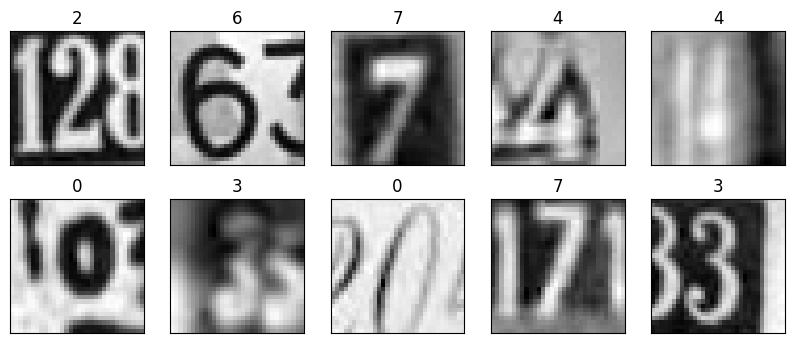

In [6]:
# Declaring the number of rows
rows = 2
# Declaring the number of columns
cols = 5

fig = plt.figure(figsize = (10, 4))
imgCount = 0

# for each column
for i in range(cols):
    # for each row
    for j in range(rows):
        # add image
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_train[imgCount, :], cmap='gray')

        # add label
        ax.set_title(y_train[imgCount])

        # remove tickmarks and text
        ax.tick_params('y', labelleft=False)
        ax.tick_params('x', labelbottom=False)
        ax.set_xticks(ticks=[])
        ax.set_yticks(ticks=[])

        imgCount += 1

# Display the plot
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape and array of first image in training dataset:")
print("Shape:",X_train[0].shape)
print(X_train[0])

Shape and array of first image in training dataset:
Shape: (32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [8]:
# Reshaping the dataset to flatten them. Reshaping the 2D image into a 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [9]:
# Normalizing the image pixels by dividing by 255
x_train_norm = X_train.astype('float32')/255.0
x_test_norm = X_test.astype('float32')/255.0

In [10]:
# confirm noramlization worked
print(x_train_norm[0])

[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]


Print the shapes of Training and Test data

In [11]:
# Print the shapes of Training and Test data
print("x_train_norm:", x_train_norm.shape)
print("x_test_norm:", x_test_norm.shape)

x_train_norm: (42000, 1024)
x_test_norm: (18000, 1024)


**Observations:**
- the shapes of x_train and x_test have changed considerably
- both datasets now contain 1D arrays of length 1024 instead of images which were 2D arrays of length 32x32

### **One-hot encode output**

In [12]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [13]:
# print encoded data and shapes to verify encoded was successful
print("y_train_encoded:")
print(y_train_encoded)
print(type(y_train_encoded))
print("- - - - - - - -")
print("y_train shape:,",y_train.shape)
print("y_train_encoded shape:",y_train_encoded.shape)
print("y_test shape:,",y_test.shape)
print("y_test_encoded shape:",y_test_encoded.shape)

y_train_encoded:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
- - - - - - - -
y_train shape:, (42000,)
y_train_encoded shape: (42000, 10)
y_test shape:, (18000,)
y_test_encoded shape: (18000, 10)


**Observations:**

- encoding was successful
- the shape of the test and training answers has changed as the data is now a numpy array as opposed to a single number
- There are still 42,000 entries in the training datasets and 18,000 entries in the testing datasets




## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [14]:
# clear backend and fix the seed for random number generators
backend.clear_session()
np.random.seed(random_seed_val)
random.seed(random_seed_val)
tf.random.set_seed(random_seed_val)

### **Build and train an ANN model.**

In [15]:
# function to create ann_model_1
def nn_model_1():
  # Create a Sequential Object
  model = Sequential()

  # Add dense layer with 64 neurons to the sequental object
  model.add(Dense(64, input_shape = (1024, ), activation = 'relu'))

  # Add dense layer with 32 neurons to the sequental object
  model.add(Dense(32, activation = 'relu'))

  # Output layer with 10 neurons for the 10 classes
  model.add(Dense(10,activation = 'softmax'))

  # Compile the model
  model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

  return model

In [16]:
# get model and print summary
ann_model_1 = nn_model_1()
ann_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Set the number of epochs for training
num_epochs = 20

# Set the batch size for training
batch_size = 128

# Set the valiation split for training
validation_split = 0.2

# Fit the model
ann_history_1 = ann_model_1.fit(

            x_train_norm, y_train_encoded,

            epochs = num_epochs,

            batch_size= batch_size,

            validation_split = validation_split,

            verbose = 1

            )

Epoch 1/20
263/263 [==============================] - 7s 5ms/step - loss: 2.2966 - accuracy: 0.1149 - val_loss: 2.2563 - val_accuracy: 0.1470
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1132 - accuracy: 0.2275 - val_loss: 1.9753 - val_accuracy: 0.3154
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.9138 - accuracy: 0.3293 - val_loss: 1.8557 - val_accuracy: 0.3582
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8125 - accuracy: 0.3811 - val_loss: 1.7706 - val_accuracy: 0.4001
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.7037 - accuracy: 0.4256 - val_loss: 1.6556 - val_accuracy: 0.4427
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5946 - accuracy: 0.4629 - val_loss: 1.5464 - val_accuracy: 0.4857
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5175 - accuracy: 0.4941 - val_loss: 1.5090 - val_accuracy: 0.4979
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

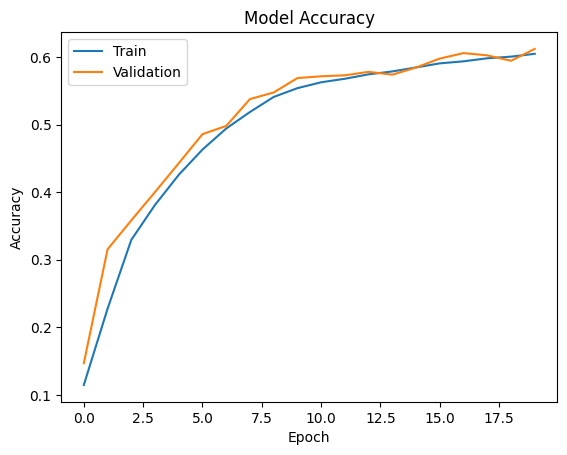

In [18]:
# create training/validation accuracy plot
plt.plot(ann_history_1.history['accuracy'])

plt.plot(ann_history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations - ann_model_1:**
- the model does not seem to be overfitting the training data
- accuracy is low as it is just over .60, this can likely be improved upon



Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [19]:
#clear backend and set random seed
backend.clear_session()
np.random.seed(random_seed_val)
random.seed(random_seed_val)
tf.random.set_seed(random_seed_val)

### **Build and train a second ANN model**

In [20]:
def nn_model_2():
  # Create a Sequential Object
  model = Sequential()

  # Add first layer with 256 neurons to the sequental object
  model.add(Dense(256, input_shape = (1024, ), activation = 'relu'))

  # Add second layer with 128 neurons to the sequental object
  model.add(Dense(128, activation = 'relu'))

  # Adding dropout to randomly switch off 20% of the network to reduce overfitting
  model.add(Dropout(0.20))

  # Add dense layer with 64 neurons to the sequental object
  model.add(Dense(64, activation = 'relu'))

  # Add dense layer with 64 neurons to the sequental object
  model.add(Dense(64, activation = 'relu'))

  # Add dense layer with 32 neurons to the sequental object
  model.add(Dense(32, activation = 'relu'))

  # Add batch normalization layer
  model.add(BatchNormalization())

  # Output layer with 10 neurons (for the ten classes)
  model.add(Dense(10,activation = 'softmax'))

  # Compile the model
  model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
              )

  return model

In [21]:
ann_model_2 = nn_model_2()
ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [22]:
# Set the number of epochs for training
num_epochs = 30

# Set the batch size for training
batch_size = 128

# Set the cvaliation split for training
validation_split = 0.2

# Fit the model
ann_history_2 = ann_model_2.fit(

            x_train_norm, y_train_encoded,

            epochs = num_epochs,

            batch_size= batch_size,

            validation_split = validation_split,

            verbose = 1
            )

Epoch 1/30
263/263 [==============================] - 4s 6ms/step - loss: 2.3276 - accuracy: 0.1003 - val_loss: 2.3076 - val_accuracy: 0.0979
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 2.3035 - accuracy: 0.1052 - val_loss: 2.2989 - val_accuracy: 0.1051
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 2.0806 - accuracy: 0.2295 - val_loss: 1.9587 - val_accuracy: 0.3573
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.5230 - accuracy: 0.4797 - val_loss: 1.3930 - val_accuracy: 0.5642
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.2870 - accuracy: 0.5769 - val_loss: 1.2090 - val_accuracy: 0.6019
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1876 - accuracy: 0.6152 - val_loss: 1.0819 - val_accuracy: 0.6521
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1011 - accuracy: 0.6447 - val_loss: 1.0034 - val_accuracy: 0.6815
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

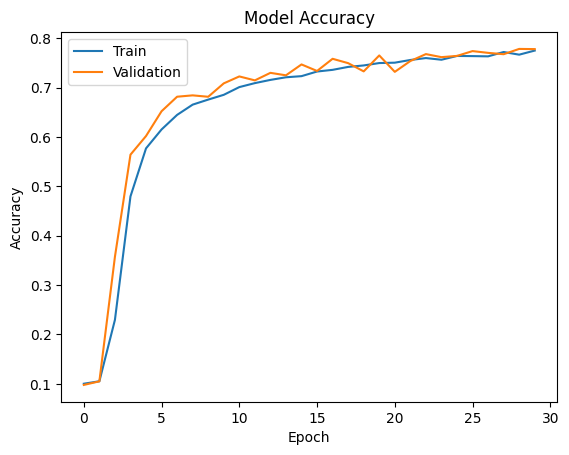

In [23]:
plt.plot(ann_history_2.history['accuracy'])

plt.plot(ann_history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations - ann_model_2:**

- adding complexity to the network has improved performance
- model does not seem to be overfitting the training data
- the drop layer and batch normalization layer decrease overfitting, but not as much as might be expected. Without these layers the difference between the training and validation accuracies only increases a tiny bit
- the accuracy of this model is substantially better than the last, getting up to almost .80


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [24]:
# Here we would get the output as probablities for each category
y_pred=ann_model_2.predict(x_test_norm)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [25]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

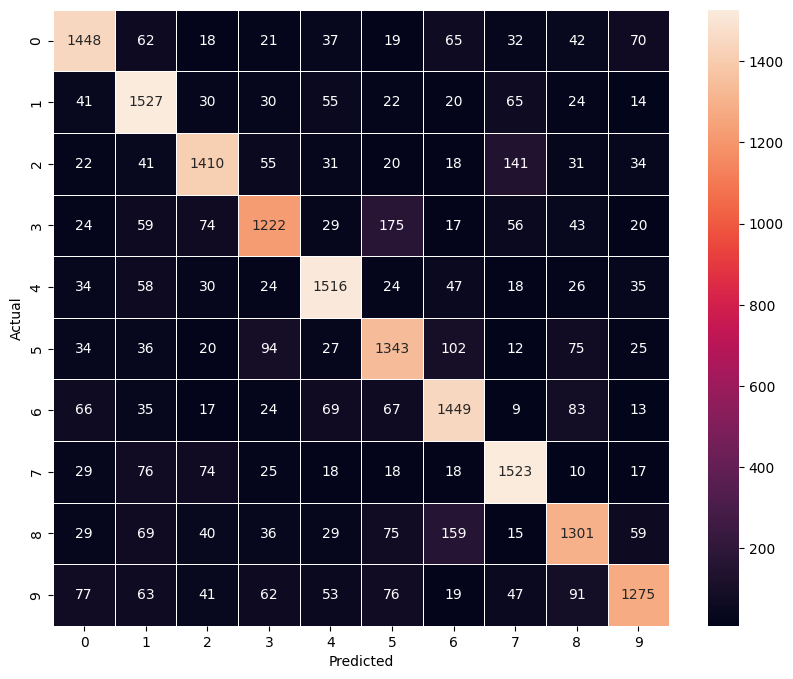

In [26]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1814
           1       0.75      0.84      0.79      1828
           2       0.80      0.78      0.79      1803
           3       0.77      0.71      0.74      1719
           4       0.81      0.84      0.82      1812
           5       0.73      0.76      0.74      1768
           6       0.76      0.79      0.77      1832
           7       0.79      0.84      0.82      1808
           8       0.75      0.72      0.74      1812
           9       0.82      0.71      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



**Final Observations:**

- ann_model_2 has an accuracy of about .78
- ann_model_2 is an improvement over ann_model_1, but it seems likey that we can create a model with even better accuracy
- it is most common mistake for ann_model_2 is to mislabel a 2 as a 7
- ann_model_2 also shows a high number of mistakes labeling 1's as 7's and labeling 5's as 3's

- because overfitting does not seem to be an issue, we should add to the complexity of the ANN to see if it will improve our accuracy

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [28]:
# open the hdf5 file
hdf = h5py.File('/content/drive/My Drive/MIT_DataScience/Elective Project/SVHN_single_grey1.h5', 'r')

# get training data
X_train = hdf.get('X_train')
y_train = hdf.get('y_train')
X_train = X_train[()] # this gets the actual dataframe from the hdf file object
y_train = y_train[()]

# get test data
X_test = hdf.get('X_test')
y_test = hdf.get('y_test')
X_test = X_test[()]
y_test = y_test[()]

hdf.close()

Check the number of images in the training and the testing dataset.

In [29]:
# Print the shapes of Training and Test data
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("")
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (42000, 32, 32)
y_train: (42000,)

x_test: (18000, 32, 32)
y_test: (18000,)


**Observation:**
- training and testing datasets are the same as before
-  42,000 training images/labels and 18,000 testing images/labels
- images are 32x32 pixels


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [30]:
# Print the shape and the array of pixels for the first image in the training dataset
print("Shape and array of first image in training dataset:")
print("Shape:",X_train[0].shape)
print(X_train[0])

Shape and array of first image in training dataset:
Shape: (32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [31]:
# Reshaping the training and the testing data
X_train = X_train.reshape(42000, 32, 32, 1)
X_test = X_test.reshape(18000, 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [32]:
# Normalizing the image pixels
x_train_norm = X_train.astype('float32')/255.0
x_test_norm = X_test.astype('float32')/255.0

Print New shape of Training and Test

In [33]:
print("x_train_norm shape:",x_train_norm.shape)
print("x_test_norm shape:",x_test_norm.shape)

x_train_norm shape: (42000, 32, 32, 1)
x_test_norm shape: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [34]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [35]:
# print y_train_encoded and dataframe shapes to check encoding worked properly
print("y_train_encoded:")
print(y_train_encoded)
print(type(y_train_encoded))
print("- - - - - - - -")
print("y_train shape:,",y_train.shape)
print("y_train_encoded shape:",y_train_encoded.shape)
print("y_test shape:,",y_test.shape)
print("y_test_encoded shape:",y_test_encoded.shape)

y_train_encoded:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
- - - - - - - -
y_train shape:, (42000,)
y_train_encoded shape: (42000, 10)
y_test shape:, (18000,)
y_test_encoded shape: (18000, 10)


**Observation:**
- encoding was successful
- once again, the shape of the test and training answers has changed as the data is now a numpy array as opposed to a single number
- There are still 42,000 entries in the training dataset and 18,000 entries in the testing dataset


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [36]:
#clear backend and set random seed
backend.clear_session()
np.random.seed(random_seed_val)
random.seed(random_seed_val)
tf.random.set_seed(random_seed_val)

### **Build and train a CNN model.**

In [37]:
def cnn_model_1():
  # Intializing a sequential model
  model1 = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same,' provides the output size same as the input size
  model1.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

  # Adding LeakyRelu activation function with a slope of 0.1
  model1.add(LeakyReLU(0.1))

  # Adding conv layer with 32 filters and kernel size 3x3 , padding 'same'
  model1.add(Conv2D(32, (3, 3), padding="same"))

  # Adding another LeakyRelu activation function with a slope of 0.1
  model1.add(LeakyReLU(0.1))

  # Adding max pooling layer
  model1.add(MaxPooling2D((2, 2)))

  # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model1.add(Flatten())

  # Adding a fully connected dense layer with 100 neurons
  model1.add(Dense(32))

  # Adding another LeakyRelu activation function with a slope of 0.1
  model1.add(LeakyReLU(0.1))

  # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
  model1.add(Dense(10, activation='softmax'))

  # Compile model
  model1.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

  return model1

In [38]:
cnn_model_1 = cnn_model_1()
# Generating the summary of the model
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [39]:
# Set the number of epochs for training
num_epochs = 20

# Set the batch size for training
batch_size = 32

# Set the cvaliation split for training
validation_split = 0.2

# Fit the model
cnn_history_1 = cnn_model_1.fit(

            x_train_norm, y_train_encoded,

            epochs = num_epochs,

            batch_size= batch_size,

            validation_split = validation_split,

            verbose = 1
            )

Epoch 1/20
1050/1050 [==============================] - 11s 4ms/step - loss: 1.1186 - accuracy: 0.6335 - val_loss: 0.6518 - val_accuracy: 0.8100
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5354 - accuracy: 0.8481 - val_loss: 0.5192 - val_accuracy: 0.8524
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4460 - accuracy: 0.8688 - val_loss: 0.5108 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3855 - accuracy: 0.8885 - val_loss: 0.4523 - val_accuracy: 0.8736
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3400 - accuracy: 0.8977 - val_loss: 0.4479 - val_accuracy: 0.8735
Epoch 6/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3035 - accuracy: 0.9096 - val_loss: 0.4589 - val_accuracy: 0.8713
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2725 - accuracy: 0.9178 - val_loss: 0.4609 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

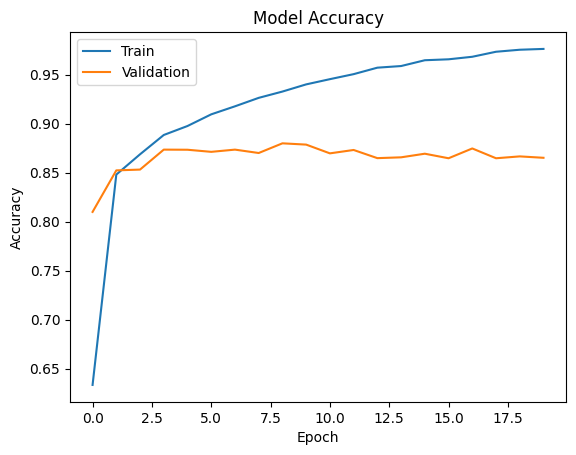

In [40]:
plt.plot(cnn_history_1.history['accuracy'])

plt.plot(cnn_history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations: cnn_model_1**
- while the training accuracy is very high, this model appears to be very overfit to the training data
- after about 5 epochs validation accuracy does not seem to improve
- however, with an accuracy at about .86 on the validation data, this is the best model we've seen yet

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [41]:
#clear backend and set random seed
backend.clear_session()
np.random.seed(random_seed_val)
random.seed(random_seed_val)
tf.random.set_seed(random_seed_val)

### **Build and train a second CNN model**

In [42]:
def cnn_model_2():
  # Intializing a sequential model
  model_2 = Sequential()

  # Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same,' provides the output size same as the input size
  model_2.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
  # Adding LeakyRelu activation function with a slope of 0.1
  model_2.add(LeakyReLU(0.1))
  # Adding second conv layer with 32 filters and kernel size 3x3 , padding 'same'
  model_2.add(Conv2D(32, (3, 3), padding="same"))
  # Adding another LeakyRelu activation function with a slope of 0.1
  model_2.add(LeakyReLU(0.1))
  # Adding max pooling layer
  model_2.add(MaxPooling2D(pool_size=(2, 2)))
  # Add batch normalization layer
  model_2.add(BatchNormalization())
  # Adding third conv layer with 32 filters and kernel size 3x3 , padding 'same'
  model_2.add(Conv2D(32, (3, 3), padding="same"))
  # Adding another LeakyRelu activation function with a slope of 0.1
  model_2.add(LeakyReLU(0.1))
  # Adding fourth conv layer with 64 filters and kernel size 3x3 , padding 'same'
  model_2.add(Conv2D(64, (3, 3), padding="same"))
  # Adding another LeakyRelu activation function with a slope of 0.1
  model_2.add(LeakyReLU(0.1))
  # Adding max pooling layer
  model_2.add(MaxPooling2D(pool_size=(2, 2)))
  # Add batch normalization layer
  model_2.add(BatchNormalization())
  # flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model_2.add(Flatten())
  # Adding a fully connected dense layer with 32 nodes
  model_2.add(Dense(32))
  # Adding another LeakyRelu activation function with a slope of 0.1
  model_2.add(LeakyReLU(0.1))
  # Adding dropout to randomly switch off 50% of the network to reduce overfitting
  model_2.add(Dropout(0.50))

  # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
  model_2.add(Dense(10, activation='softmax'))

  # Compile model
  model_2.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

  return model_2

In [43]:
# get model
cnn_model_2 = cnn_model_2()
# Generating the summary of the model
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [44]:
# Set the number of epochs for training
num_epochs = 30

# Set the batch size for training
batch_size = 128

# Set the cvaliation split for training
validation_split = 0.2

# Fit the model
cnn_history_2 = cnn_model_2.fit(

            x_train_norm, y_train_encoded,

            epochs = num_epochs,

            batch_size= batch_size,

            validation_split = validation_split,

            verbose = 1
            )

Epoch 1/30
263/263 [==============================] - 7s 14ms/step - loss: 1.3312 - accuracy: 0.5465 - val_loss: 1.7936 - val_accuracy: 0.3876
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.6670 - accuracy: 0.7940 - val_loss: 0.5452 - val_accuracy: 0.8480
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5473 - accuracy: 0.8330 - val_loss: 0.4394 - val_accuracy: 0.8725
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4872 - accuracy: 0.8512 - val_loss: 0.3991 - val_accuracy: 0.8862
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4324 - accuracy: 0.8650 - val_loss: 0.4252 - val_accuracy: 0.8819
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4003 - accuracy: 0.8777 - val_loss: 0.4225 - val_accuracy: 0.8761
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3825 - accuracy: 0.8834 - val_loss: 0.3909 - val_accuracy: 0.8908
Ep

### **Plot the Training and Validation accuracies and write your observations.**

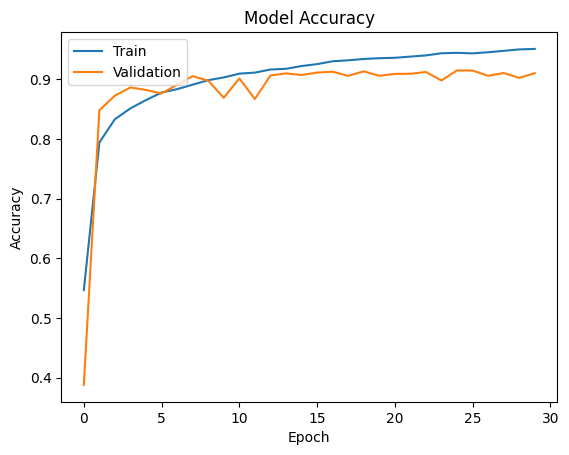

In [45]:
plt.plot(cnn_history_2.history['accuracy'])

plt.plot(cnn_history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations: cnn_model_2**

- this is the best model yet, with accuracy on the validation data reaching about .90
- the model is still overfitting the training data a little bit, so this may be an area for further improvement
- due to diminishing improvement in accuracy, 30 epochs may be an unneccessarily high number of epochs
- this means we might be able to tune this model while training over a lower number of epochs (and therefore a shorter runtime)

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [46]:
accuracy = cnn_model_2.evaluate(x_test_norm, y_test_encoded)
# Here we would get the output as probablities for each category
y_pred=cnn_model_2.predict(x_test_norm)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [47]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Write your final observations on the performance of the model on the test data.**

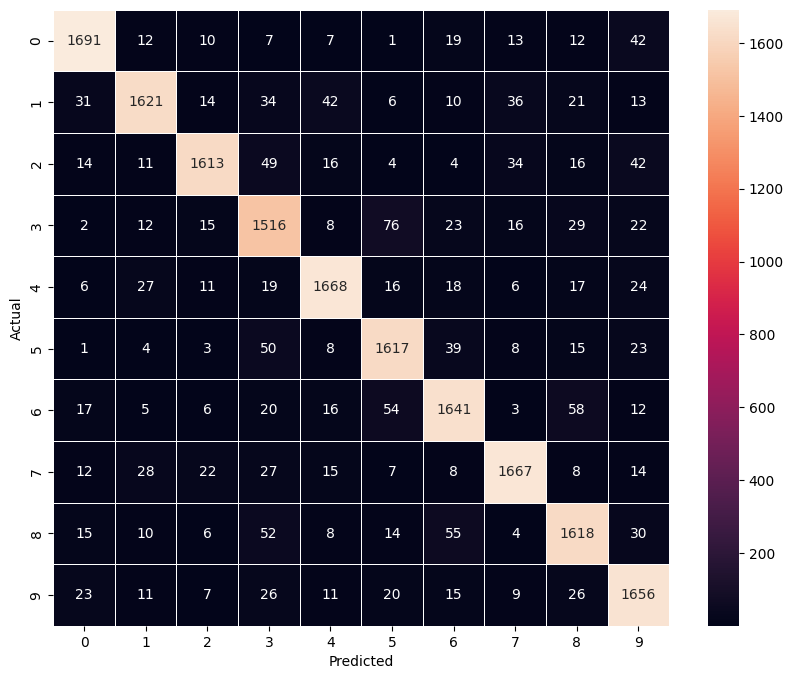

In [48]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
#Accuracy as per the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1814
           1       0.93      0.89      0.91      1828
           2       0.94      0.89      0.92      1803
           3       0.84      0.88      0.86      1719
           4       0.93      0.92      0.92      1812
           5       0.89      0.91      0.90      1768
           6       0.90      0.90      0.90      1832
           7       0.93      0.92      0.93      1808
           8       0.89      0.89      0.89      1812
           9       0.88      0.92      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



**Final Observations:**

- cnn_model_2 was the most successful model, with an accurcy of about .91
- We observed that cnn_model_2 is still slightly overfitting the training data.
- To avoid overfitting, we can try adding more dropout layers.
- regarding recall, cnn_model_2 does the best identifying 0's and the worst identifying 8's


- as we added to the complexity of a model, the model tended to show better performance. It is worth exploring how much these models could improve with further added complexities (ie. more layers, more nodes, more convolutional filters, etc).

- in general, the CNN models have outperformed the ANN models; this could suggest CNNs are the preferable model to work with for this task
